<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Book Recommender System: EDA</strong></h1>

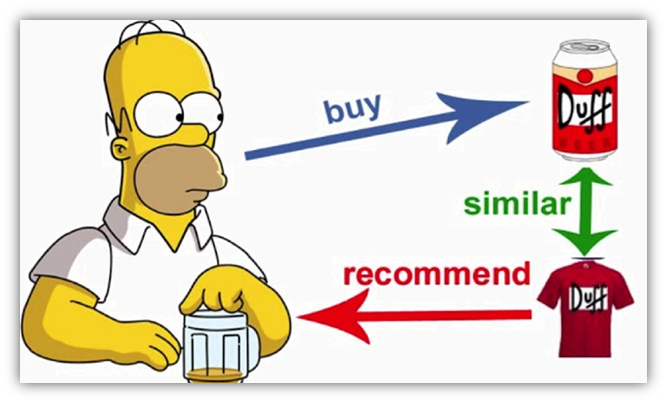

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1)

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data Information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data Processing](#2.2)

> - 2.2.1 [Drop duplicate](#2.2.1) 
> - 2.2.2 [Rename columns](#2.2.2)
> - 2.2.3 [Drop columns](#2.2.3)
> - 2.2.4 [Drop the values 0 in Rating dataframe](#2.2.4)

2.3 [Check missing values](#2.3)

> - 2.3.1 [Detect missing values](#2.3.1)
> - 2.3.2 [Impute missing values](#2.3.2)
> - 2.3.3 [Delete missing values](#2.3.3)

2.4 [Upper Case the content](#2.4)

2.5 [Extra-whitespaces](#2.5)

2.6 [Split the location column](#2.6)

2.7 [Check the content](#2.7)

2.8 [Change data type](#2.8)

2.9 [Descriptive statistics for Central Tendency](#2.9)

2.10 [Age Range](#2.10)

2.11 [Merge column](#2.11)
> - 2.11.1 [Merge book and rating](#2.11.1)
> - 2.11.2 [Merge user and rating](#2.11.2)
> - 2.11.3 [Merge user_with_rating and book_with_rating](#2.11.3)

2.12 [Reduce Dimension](#2.12)

2.13 [Save the Intermediate data](#2.13)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Distribution of Rating](#3.1)

3.2 [How old are the users?](#3.2)

3.3 [The 10 country having the highest amount of users](#3.3)

3.4 [When did these books were published](#3.4)

3.5 [Average rating and number of ratings of the most popular books](#3.5)

3.6 [Average rating and number of ratings of the most popular authors](#3.6)

<br>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> 
    Thank to the growth of not only technology but also networking, the e-commercial activities has become more common so does ebook platform. Therefore, the recommender system works effectively in the ebook platform particularly, and the internet in general. There are two main algorithms for the recommender system using machine learning which are Content-based and Collaborative Filtering, nevertheless, their most considerable disadvantages are not capable of generating the recommendation for the new user without having any detail information. Since then, I will also make recommendation base on the popularity of the books. This is just a foundation notebook.
</p>

********

## 📣 What will you get after this notebook?

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> A Basic Recommender System using Content-based, Collaborative Filtering and Popularity </li>
    <li> Factors influence on the recommendation </li>
</ul>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">Book_Rating </span> is often given?</li>
    <li>Which <span style="color:#122ecc;">Book-Title </span> get the highest rating?</li>
    <li>Which <span style="color:#122ecc;">Country </span> have the highest number of users?</li>
    <li>Which <span style="color:#122ecc;">Age </span> have the highest number of users?</li>
</ul>

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install squarify
!{sys.executable} -m pip -q install geopandas
!{sys.executable} -m pip -q install country_converter


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
# overwrite the style of all the matplotlib graphs
sns.set()
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline



# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')


import EDAfunctions as f #This one is for functions in python
from dataprep.clean import validate_country #This one is for splitting


In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.22.3
Pandas version:  1.3.4
Python 3.9.7


<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

> **User Dataset**

In [3]:
## Importing the datasets
user = pd.read_csv("Data/Book-Users.csv", delimiter=';', skipinitialspace = True, encoding='cp1252')

user.columns = user.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(user.shape))

# drop Unnamed, it is just a number given to identify each house
user.head(3)

The shape of the ORGINAL data is (row, column): (278858, 3)


User-ID                         Location   Age
0        1               nyc, new york, usa   NaN
1        2        stockton, california, usa  18.0
2        3  moscow, yukon territory, russia   NaN

> **Book Dataset**

In [4]:
## Importing the datasets
book = pd.read_csv("Data/Book_List.csv", delimiter=';', skipinitialspace = True, encoding='cp1252', on_bad_lines='skip')

book.columns = book.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(book.shape))

# drop Unnamed, it is just a number given to identify each house
book.head(3)

The shape of the ORGINAL data is (row, column): (271360, 8)


ISBN            Book-Title           Book-Author Year-Of-Publication  \
0  0195153448   Classical Mythology    Mark P. O. Morford                2002   
1  0002005018          Clara Callan  Richard Bruce Wright                2001   
2  0060973129  Decision in Normandy          Carlo D'Este                1991   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2          HarperPerennial  http://images.amazon.com/images/P/0060973129.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...

> **Rating Dataset**

In [5]:
## Importing the datasets
rating = pd.read_csv("Data/Book_Ratings.csv", delimiter=';', skipinitialspace = True, encoding='cp1252', on_bad_lines='skip')

rating.columns = rating.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(rating.shape))

# drop Unnamed, it is just a number given to identify each house
rating.head(3)

The shape of the ORGINAL data is (row, column): (1149780, 3)


User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0

<a id="1.5"></a>
# 🔈 1.5 Data Information
****
Let's take a look in three dataset.
> **Sample Book Dataset**

In [6]:
print ("The shape of the Book data is (row, column):"+ str(book.shape))
print (book.info())

The shape of the Book data is (row, column):(271360, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total paitent record is 271360 with some of the missing values

> **Sample User Dataset**

In [7]:
print ("The shape of the User data is (row, column):"+ str(user.shape))
print (user.info())

The shape of the User data is (row, column):(278858, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total paitent record is 271360 with some of the missing values

> **Sample Rating Dataset**

In [8]:
print ("The shape of the Rating data is (row, column):"+ str(rating.shape))
print (rating.info())

The shape of the Rating data is (row, column):(1149780, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total paitent record is 599 with no missing and it has 11 columns.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">There are 3 dataset: </p>

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>User dataset (train.csv)</li>
    <li>Rating dataset (test.csv)</li>
    <li>Book dataset (test.csv)</li>
</ul>

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">Now let's go through the features and describe a little: </p>

***
**Categorical:** 
            
- **Ordinal**(just like nominal datatype but can be ordered or ranked)
   > - **Age** (User age) : this could be numerical and ordinal since it can be ordered
   > - **Book-Rating** (Book Rating) : this could be numerical and ordinal since it can be ordered
   
- **Norminal**(just like nominal datatype but can be ordered or ranked)
   > - **Book-Title** (Book Title)
   > - **Book-Author** (Book Title)
   > - **Publisher** (Publisher)
   > - **Image-URL-S** (Image-URL-S)
   > - **Image-URL-M** (Image-URL-M)
   > - **Image-URL-L** (Image-URL-L)
   > - **User-ID** (Image-URL-L)
   > - **Location** (Location)

   
***
**Numeric:**
- **Discrete**
  >  - **Book-Rating** (Book Rating)
  >  - **Year-Of-Publication** (Book Rating)

<a id="2.2"></a>
# ✂️ 2.2 Data Processing
***

<a id="2.2.1"></a>
## ❌ 2.2.1 Drop duplicate
****

> **Sample User Dataset**

In [9]:
print ("The shape of the data set before dropping duplicated:"+ str(user.shape))

user = user.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(user.shape))

The shape of the data set before dropping duplicated:(278858, 3)
The shape of the data set after dropping duplicated:(278858, 3)


> **Sample Rating Dataset**

In [10]:
print ("The shape of the data set before dropping duplicated:"+ str(rating.shape))

rating = rating.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(rating.shape))

The shape of the data set before dropping duplicated:(1149780, 3)
The shape of the data set after dropping duplicated:(1149780, 3)


> **Sample Book Dataset**

In [11]:
print ("The shape of the data set before dropping duplicated:"+ str(book.shape))

book = book.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(book.shape))

The shape of the data set before dropping duplicated:(271360, 8)
The shape of the data set after dropping duplicated:(271360, 8)


<a id="2.2.2"></a>
## 📌 2.2.2 Rename columns
***

> **Sample user Dataset**

In [12]:
user.rename(columns={"User-ID": "User_ID"}, inplace=True)

> **Sample rating Dataset**

In [13]:
rating.rename(columns={"User-ID": "User_ID", "Book-Rating":"Book_Rating"}, inplace=True)

> **Sample book Dataset**

In [14]:
book.rename(columns={"Book-Title": "Book_Title", "Book-Author": "Book_Author",
                     "Year-Of-Publication":"Publication_year", "Image-URL-S":"Image_URL",
                     "Image-URL-M":"Image_URL_M", "Image-URL-L":"Image_URL_L",
                    }, inplace=True)

<a id="2.2.3"></a>
## 📌 2.2.3 Drop columns
***
I do not want to store all images size for all book, so that I just want to keep the `Image_URL_S` column

In [15]:
book = book.drop(columns=['Image_URL_M', 'Image_URL_L'])

<a id="2.2.4"></a>
## 📌 2.2.4 Drop the values `0` in Rating dataframe
***


In [16]:
rslt_df = rating[(rating['Book_Rating'] == 0)]
print(len(rslt_df)/len(rating) * 100)

62.28226269373272


### ------------> OBSERVATION
***
- Most of the users gave 0 rating point. In the machine learning, when the user do not rate the book, that means the rate values is null. Nevertheless, the machine classifies it as 0 same with the users who gave 0 value. Hence the rating 0 values is recognised as the "implicit" rating which represents an interactive activities that either are positive or negative of the users for a specific item. 

- For the popularity recommender engine, we do not concern about the rating point.

- For the explicit and implicit rating values we need to deal with them differently. We want to focus to recommend the people have the least implicit feedback and then we would drop all implicit feedback

In [ ]:
rslt_df = rating[(rating['Book_Rating'] == 0)]
print(len(rslt_df)/len(rating) * 100)

<a id="2.3"></a>
# 👀 2.3 Check missing values 
***

<a id="2.3.1"></a>
## 🔎 2.3.1 Detect missing values 
****

> **Sample user Dataset**

Missing values in the user dataframe in descending: 
       Total  Percent
Age  110762    39.72


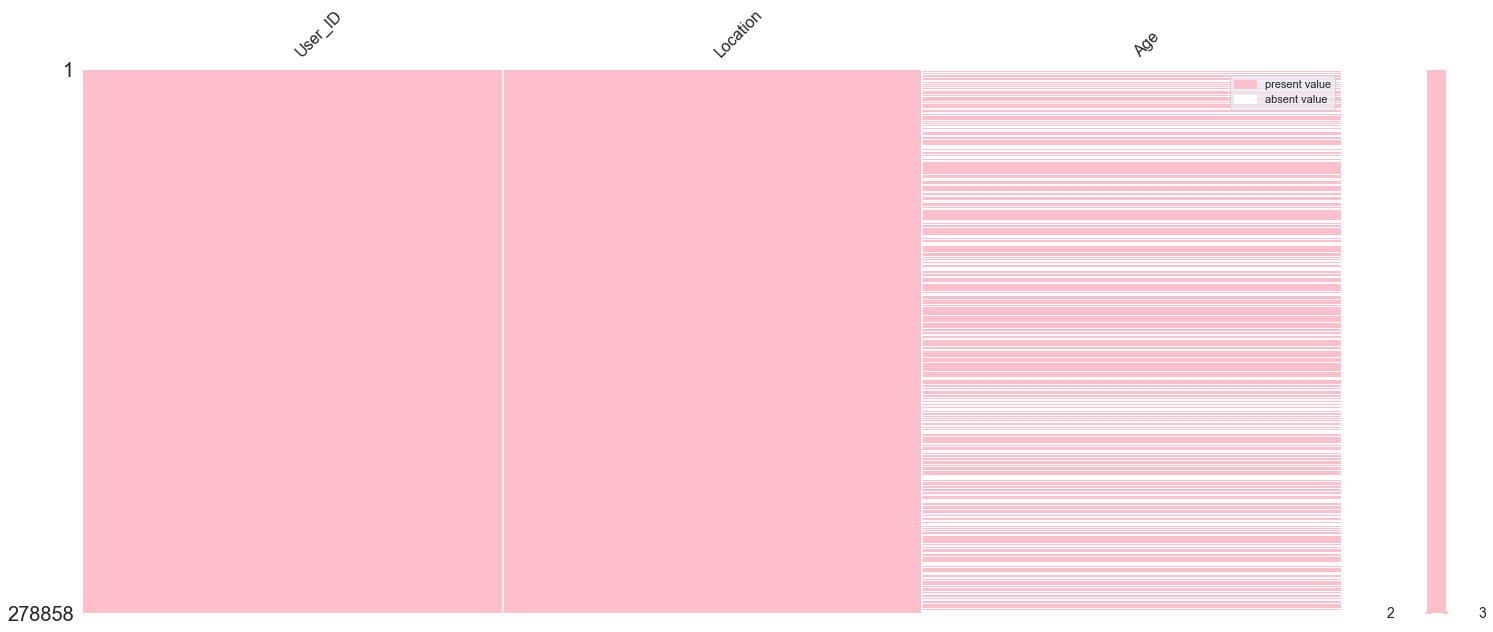

In [18]:
f.draw_missing_plot(user)

### ------------> OBSERVATION
***
The amount of missing values of Age column is considerable, I still want to fill them, since I still want to use both of collaborating filtering and content based.

> **Sample rating Dataset**

Missing values in the user dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


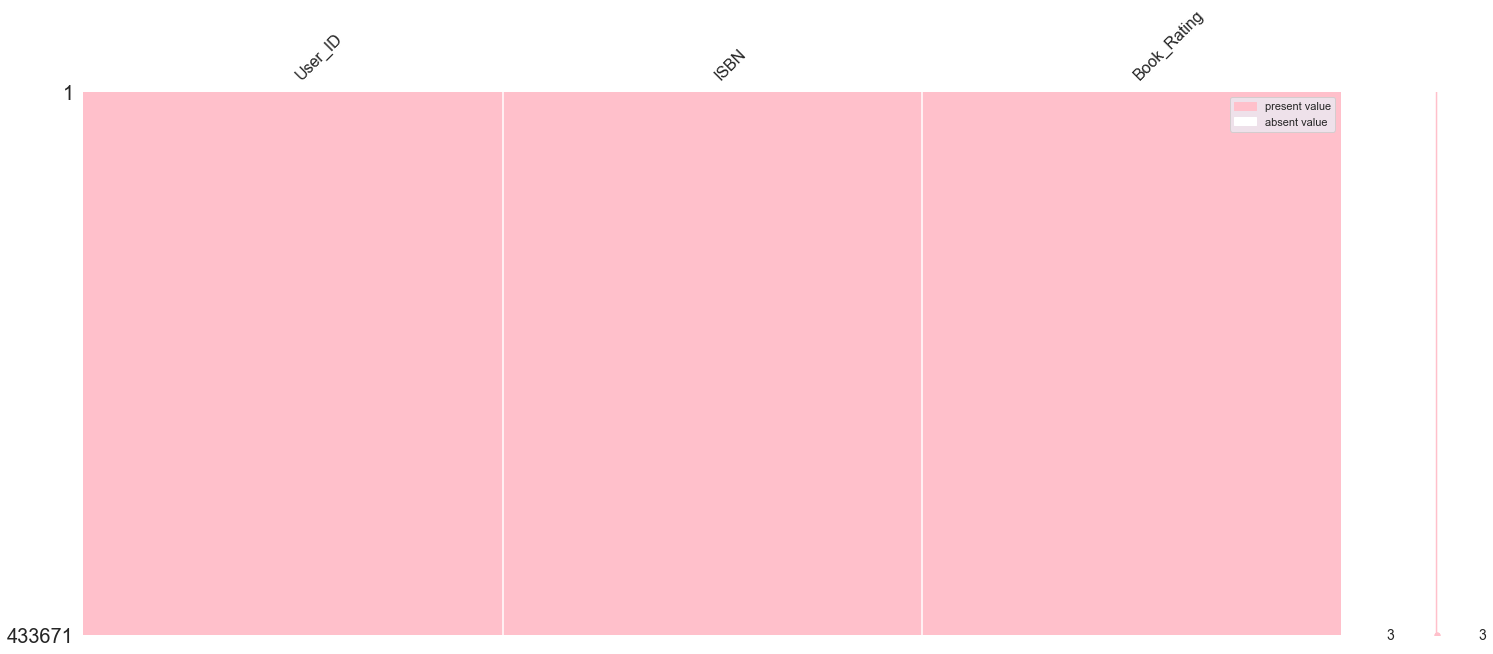

In [19]:
f.draw_missing_plot(rating)

### ------------> OBSERVATION
***
There are no missing values.

> **Sample book Dataset**

Missing values in the user dataframe in descending: 
              Total  Percent
Publisher        2      NaN
Book_Author      1      NaN


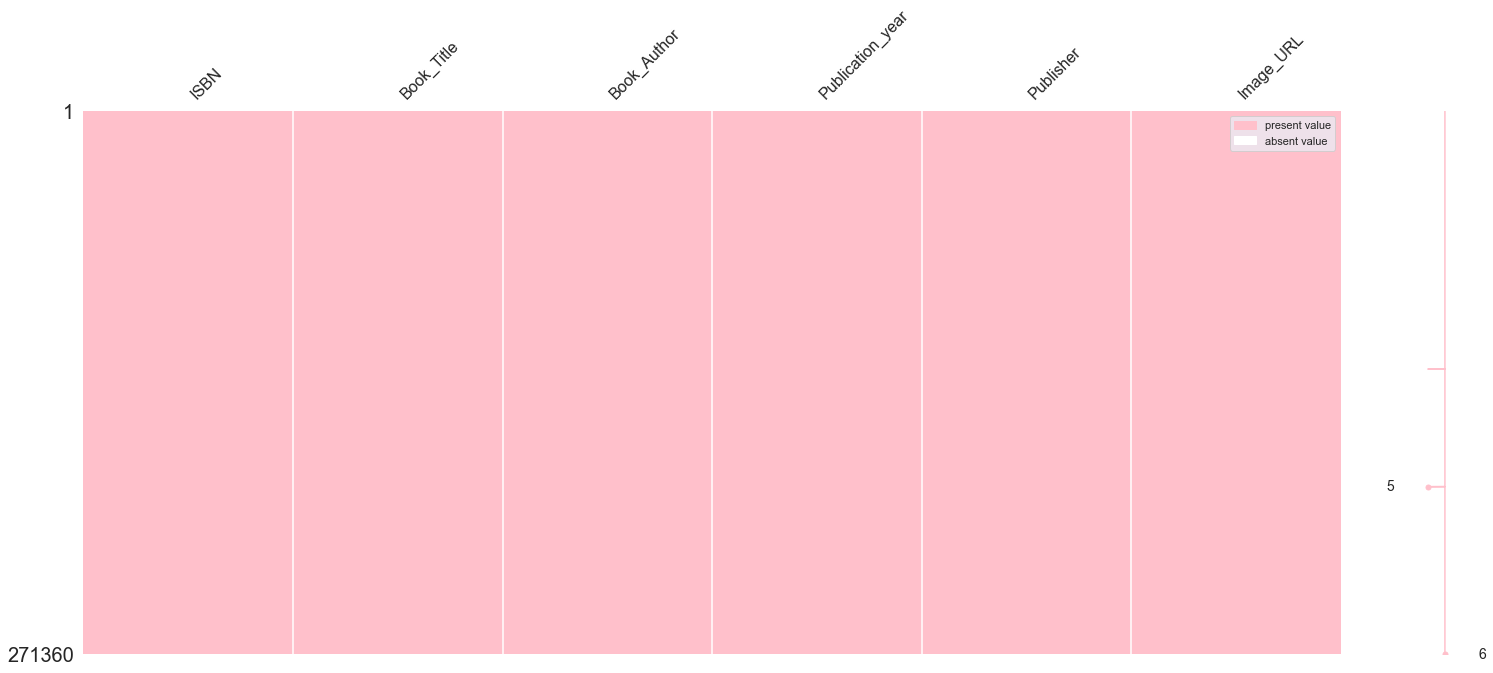

In [20]:
f.draw_missing_plot(book)

### ------------> OBSERVATION
***
There are just 3 three null values I do not want to try to fill them, I will delete them instead since they cannot effect the dataset.

<a id="2.3.2"></a>
## 🔎 2.3.2 Impute missing values 
****

> **Sample user Dataset**

In [21]:
user['Age'].fillna(int(user['Age'].mean()), inplace=True)

<a id="2.3.3"></a>
## 🔎 2.3.3 Delete missing values 
****

In [22]:
book = book.dropna(axis = 0, how ='any')

<a id="2.4"></a>
# 💭 2.4 Upper Case the content
****

> **Sample Book Dataset**

In [23]:
# # Cast all values inside the dataframe (except the columns' name) into upper case.
book = book.applymap(lambda s: s.upper() if type(s) == str else s)
book.head(3)

ISBN            Book_Title           Book_Author Publication_year  \
0  0195153448   CLASSICAL MYTHOLOGY    MARK P. O. MORFORD             2002   
1  0002005018          CLARA CALLAN  RICHARD BRUCE WRIGHT             2001   
2  0060973129  DECISION IN NORMANDY          CARLO D'ESTE             1991   

                 Publisher                                          Image_URL  
0  OXFORD UNIVERSITY PRESS  HTTP://IMAGES.AMAZON.COM/IMAGES/P/0195153448.0...  
1    HARPERFLAMINGO CANADA  HTTP://IMAGES.AMAZON.COM/IMAGES/P/0002005018.0...  
2          HARPERPERENNIAL  HTTP://IMAGES.AMAZON.COM/IMAGES/P/0060973129.0...

> **Sample User Dataset**

In [24]:
# # Cast all values inside the dataframe (except the columns' name) into upper case.
user = user.applymap(lambda s: s.upper() if type(s) == str else s)
user.head(3)

User_ID                         Location   Age
0        1               NYC, NEW YORK, USA  34.0
1        2        STOCKTON, CALIFORNIA, USA  18.0
2        3  MOSCOW, YUKON TERRITORY, RUSSIA  34.0

> **Sample Rating Dataset**

In [25]:
# # Cast all values inside the dataframe (except the columns' name) into upper case.
rating = rating.applymap(lambda s: s.upper() if type(s) == str else s)
rating.head(3)

User_ID        ISBN  Book_Rating
1   276726  0155061224            5
3   276729  052165615X            3
4   276729  0521795028            6

<a id="2.5"></a>
# 💭 2.5 Extra-whitespaces
****

In [26]:
# remove all the extra whitespace
f.whitespace_remover(user)
f.whitespace_remover(rating)

<a id="2.6"></a>
# 💭 2.6 Split the location column
****

In [27]:
# #Expand columns:
user_location_expanded = user.Location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['City', 'State', 'Country']
user = user.join(user_location_expanded)
#Drop column Location:
user.drop(columns=['Location', 'City', 'State'], inplace=True)
user = user.dropna(axis = 0, how ='any')

user.head()

User_ID   Age          Country
0        1  34.0              USA
1        2  18.0              USA
2        3  34.0           RUSSIA
3        4  17.0         PORTUGAL
4        5  34.0   UNITED KINGDOM

## Recheck

In [28]:
f.check_content(user, 'Country')

 USA
 CANADA
 UNITED KINGDOM
 GERMANY
 SPAIN
 AUSTRALIA
 ITALY

 FRANCE
 PORTUGAL
 NEW ZEALAND
 NETHERLANDS
 SWITZERLAND
 BRAZIL
 CHINA
 SWEDEN
 INDIA
 AUSTRIA
 MALAYSIA
 ARGENTINA
 SINGAPORE
 FINLAND
 BELGIUM
 MEXICO
 DENMARK
 IRELAND
 PHILIPPINES
 TURKEY
 POLAND
 PAKISTAN
 GREECE
 IRAN
 ROMANIA
 CHILE
 ISRAEL
 SOUTH AFRICA
 INDONESIA
 NORWAY
 JAPAN
 CROATIA
 SOUTH KOREA
 SLOVAKIA
 NIGERIA
 CZECH REPUBLIC
 RUSSIA
 YUGOSLAVIA
 HONG KONG
 TAIWAN
 COSTA RICA
 ENGLAND, UNITED KINGDOM
 SLOVENIA
 PERU
 VIETNAM
 VENEZUELA
 EGYPT
 BULGARIA
 COLOMBIA
 SPAIN"
 LUXEMBOURG
 HUNGARY
 THAILAND
 GHANA
 PORTUGAL"
 SAUDI ARABIA
 ESPAÑA
 UNITED ARAB EMIRATES
 CALIFORNIA, USA
 BOSNIA AND HERZEGOVINA
 SRI LANKA
 DENMARK"
 ICELAND
 SWEDEN"
 PARAGUAY
 GUATEMALA
 BANGLADESH
 ANDORRA
 LITHUANIA
 UKRAINE
 LATVIA
 BOLIVIA
 BAHAMAS
 NEW YORK, USA
 TEXAS, USA
 JAMAICA
 ECUADOR
 BRITISH COLUMBIA, CANADA
 LEBANON
 PANAMA
 CUBA
 KUWAIT
 LA FRANCE
 MOROCCO
 MALTA
 FRANCE"
 SCOTLAND
 TRINIDAD AND TOBAGO
 ALBANIA
 L`I

### ------------> OBSERVATION
***
There are some of the error in the `Country` columns. I realise this column is the name of the columns so I want to use the library `dataprep` and use `validate_country()` function to check the country name.

In [29]:
error_country = user['Country'][~validate_country(user['Country'])]

print("The percent that countries have error: " +str(len(error_country)/ len(user) * 100))

The percent that countries have error: 2.8007286915110305


### ------------> OBSERVATION
***
Since the percentage is small so I want to drop them.

In [30]:
user.loc[user['Country'].isin(error_country), 'Country'] = 'NA'
user.drop(user[user['Country'].isin(['NA'])].index, inplace = True)

## Strip some of the extra whitespaces in `Country`

In [31]:
user['Country'] = user['Country'].str.strip()
empty_string_country = user[user.Country == ''].Country.count()
nan_country = user.Country.isnull().sum()
print(f'There are {empty_string_country} entries with empty strings, and {nan_country} NaN entries in the Country field')
user.drop(user[user['Country'].isin([''])].index, inplace = True)

There are 0 entries with empty strings, and 0 NaN entries in the Country field


<a id="2.7"></a>
# ️🎧 2.7 Check the content:
****

> **Sample Book Dataset**

In [ ]:
f.check_content(book, 'Book_Title')

SELECTED POEMS
LITTLE WOMEN
WUTHERING HEIGHTS
THE SECRET GARDEN
DRACULA
THE NIGHT BEFORE CHRISTMAS
ADVENTURES OF HUCKLEBERRY FINN
JANE EYRE
PRIDE AND PREJUDICE
GREAT EXPECTATIONS
NEMESIS
BLACK BEAUTY
MASQUERADE
FRANKENSTEIN
BELOVED
EMMA
LEGACY
THE GIFT
THE WIND IN THE WILLOWS
THE WEDDING
JOURNEY
MACBETH
THE PROMISE
SACRIFICE
THE SECRET
SENSE AND SENSIBILITY
PSYCHOLOGY
PARADISE
ROBINSON CRUSOE
ILLUSIONS
FAHRENHEIT 451
DREAMCATCHER
HEIDI
KING LEAR
HANNIBAL
DINOSAURS
THE HOBBIT
PHONICS FUN: READING PROGRAM, PACK 4 (CLIFFORD THE BIG RED DOG)
FLESH AND BLOOD
BEST FRIENDS
CARRIE
CINDERELLA
MIRAGE
SISTERS
THE TWO TOWERS (THE LORD OF THE RINGS, PART 2)
WHEN THE WIND BLOWS
THE EDGE
EYE OF THE BEHOLDER
MADAME BOVARY
THE RETURN OF THE KING (THE LORD OF THE RINGS, PART 3)
HOMECOMING
ASHES TO ASHES
REMEMBER ME
MATILDA
SECRETS
THE PRINCE
ANNE OF GREEN GABLES
UNNATURAL CAUSES
PETER PAN
TREASURE ISLAND
SLEEPING BEAUTY
ON THE ROAD
FINDERS KEEPERS
WHISPERS
COLLECTED POEMS
LOVE
THE VELVETEEN RABBIT
MOBY 

### ------------> OBSERVATION
***
I realise there are some of the book have the similarity in name so I want to discover it a little bit.

In [ ]:
top_titles = book.Book_Title.value_counts()[:10]
print(f'The 10 book titles with the most entries in the book dataframe are:\n{top_titles}')

### ------------> OBSERVATION
***
It is important to observe the book title. ISBN numbers are unique for each book, but there are still different form of ISBN ex: e-book, paperback, e.g.. Since then, there are some books have multiple ISBN entries. In this dataframe, the `SELECTED POEMS` has 28 different ISBNs, and each corresponding to a different version of the book.

In [ ]:
book[book.Book_Title=='SELECTED POEMS']

### ------------> OBSERVATION
***
It looks like `SELECTED POEMS` is the common name for book titles, but let's take a look in another book title.

In [ ]:
book[book.Book_Title=='LITTLE WOMEN']

### ------------> OBSERVATION
***
> - It looks like each ISBN assigned to the book 'Jane Eyre' has different Publisher and Year of Publication.
> - The ISBN format must be in a specific form and should not have a mutiple ISBN values, so I will do that later.

In [ ]:
f.check_content(book, 'Publisher')

### ------------> OBSERVATION
***
There are some of the ampersand formating. I want to clean them

In [ ]:
book.Publisher = book.Publisher.str.replace('&amp', '&', regex=False)

In [ ]:
empty_string_publisher = book[book.Publisher == ''].Publisher.count()
nan_publisher = book.Publisher.isnull().sum()
print(f'There are {empty_string_publisher} entries with empty strings, and {nan_publisher} NaN entries in the Publisher field')

### ------------> OBSERVATION
***
There are no empty string in Pulisher

In [ ]:
f.check_content(book, 'Publication_year')

### ------------> OBSERVATION
***
There are some of the values that are not number, I want to have a detail look over it

In [ ]:
new_df = book[book['Publication_year'].str.contains('\d', na=False)]
print(len(new_df)/ len(book) * 100)
new_df

In [ ]:
# Convert years to float
book.Publication_year = pd.to_numeric(book.Publication_year, errors='coerce')
# Check for 0's or NaNs in Year of Publication
zero_yr = book[book.Publication_year == 0].Publication_year.count()
nan_yr = book.Publication_year.isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')

# Drop all values in Publication_year which is lower than 5
book.drop(book[(book["Publication_year"] < 5)].index, inplace = True)
book = book.dropna(axis = 0, how ='any')

### ------------> OBSERVATION
***
As we can see, most of the the values in the `Publication_year` is not correct. So I want to deal with it

> **Sample Rating Dataset**

In [ ]:
f.check_content(rating, 'Book_Rating')

<a id="2.8"></a>
# ️🎧 2.8 Change data type:
****

> **Sample Book Dataset**

In [ ]:
book['ISBN'] = book['ISBN'].astype('string')
book['Book_Title'] = book['Book_Title'].astype('string')
book['Book_Author'] = book['Book_Author'].astype('string')
book['Publisher'] = book['Publisher'].astype('string')
book['Image_URL'] = book['Image_URL'].astype('string')
book['Publication_year'] = book['Publication_year'].astype('int')

> **Sample User Dataset**

In [ ]:
user['User_ID'] = user['User_ID'].astype('int')
user['Country'] = user['Country'].astype('string')
user['Age'] = user['Age'].astype('int')


> **Sample Rating Dataset**

In [ ]:
rating['User_ID'] = rating['User_ID'].astype('int')
rating['ISBN'] = rating['ISBN'].astype('string')
rating['Book_Rating'] = rating['Book_Rating'].astype('int')


<a id="2.9"></a>
# 📊 2.9 Descriptive statistics for Central Tendency
****


> **Sample Book Dataset**

In [ ]:
# see the static of all numerical column
book.describe().T

### ------------> OBSERVATION
***
As we can see, there are some outliers in the `Publication_year`. Since, currently, it is just 2022, but there are some book that "will be" publish in 2050. Moreover, there are some book were published in a very very long time ago. I want to take a look first. 

In [ ]:
very_old_books = book[book.Publication_year<1900] # create df of old books
very_old_books

In [ ]:
books_from_the_future = book[book.Publication_year>2022] # create df of books with publication yrs in the future!
books_from_the_future

### ------------> OBSERVATION
***
> - The very old book should be removed as they cause our model to be skewed, as well as they are not relevant to the wider userbase.
> - Some of the book in the `Future books` were wrongly inputed.
> - Some of them were wrongly inputed so I want to fix them first before droping

## Deal with very old book

In [ ]:
book.loc[book['ISBN']== '0781228956', 'Publication_year'] = 1992
book.loc[book['ISBN']== '9643112136', 'Publication_year'] = 2010
book.loc[book['ISBN']== '0781268001', 'Publication_year'] = 1998
#I drop this book since I cannot find the real publish year
book.drop(book[(book["ISBN"] == '964442011X')].index, inplace = True)


## Deal with `future` book

In [ ]:
book.loc[book['ISBN']== '0671746103', 'Publication_year'] = 1991
book.loc[book['ISBN']== '0671791990', 'Publication_year'] = 2003
book.loc[book['ISBN']== '0870449842', 'Publication_year'] = 1999
book.loc[book['ISBN']== '0140301690', 'Publication_year'] = 1950
book.loc[book['ISBN']== '0140201092', 'Publication_year'] = 1950
book.loc[book['ISBN']== '0394701658', 'Publication_year'] = 1959
book.loc[book['ISBN']== '3442436893', 'Publication_year'] = 2006
book.loc[book['ISBN']== '0870446924', 'Publication_year'] = 1999
book.loc[book['ISBN']== '0671266500', 'Publication_year'] = 1961
book.loc[book['ISBN']== '0684718022', 'Publication_year'] = 1970
book.loc[book['ISBN']== '0380000059', 'Publication_year'] = 1974
book.loc[book['ISBN']== '068471809X', 'Publication_year'] = 1937
book.loc[book['ISBN']== '0671740989', 'Publication_year'] = 1991


> **Sample User Dataset**

In [ ]:
# see the static of all numerical column
user.describe().T

In [ ]:
user.boxplot('Age')

### ------------> OBSERVATION
***
As we can see, there are some 0 values for age columns. It's not true for an infant who are 0 year old to read book!! Moreover, are also some values that users are over 100 years old. So I would like to see those impossible values.

> - The user who are 0 year old are impossible so I would like to drop
> - From my personal point of view, the recommender system should better concentrates on the people who are from 5 to 90 years old, since this is the normal range for age.


In [ ]:
df_filtered = user[(user["Age"] < 5)|(user["Age"] >= 90)]
print(len(df_filtered)/ len(user) * 100)
df_filtered

### ------------> OBSERVATION
***
These values just accounts for just a small amount of number. Moreover, the age of people who are out of the normal range I would like to drop these column.

In [ ]:
user.drop(user[(user["Age"] < 5)|(user["Age"] >= 90)].index, inplace = True)

> **Sample Rating Dataset**

In [ ]:
# see the static of all numerical column
rating.describe().T

In [ ]:
rating.boxplot('Book_Rating')

<a id="2.10"></a>
# 📌 2.10 Age Range
***
> - In the recommendation system, one of the most considerable factor for generating a valuable recommendation is the age. Some of the book that is not for the child who are under 18 should not be recommended to the children. Since then, I want to create a new column which is `Age_Range`.
> - Secondly, the `Age` Column is the ordinal so this column is appropriate to do that.

In [ ]:
# create a list of my conditions
conditions = [
    (user['Age'] < 18),
    (user['Age'] >= 18) & (user['Age'] <= 36),
    (user['Age'] > 36) & (user['Age'] <= 40),
    (user['Age'] > 40) & (user['Age'] <= 60),
    (user['Age'] > 60) & (user['Age'] < 90),
    ]

# create a list of the values we want to assign for each condition
values = ['Under 18', '18-36', '36-40', '40-60', '60-90']

# create a new column and use np.select to assign values to it using our lists as arguments
user['Age_Range'] = np.select(conditions, values)

# display updated DataFrame
user.head()

<a id="2.11"></a>
# ✂ 2.11 Reduce Dimension
***

I chose the people who have rated for our system at least 5 times in order to reduce the storage.

In [ ]:
rslt_df = rating[(rating['Book_Rating'] == 0)]
print(len(rslt_df)/len(rating) * 100)

In [ ]:
user_ratings_threshold = 5

filter_users = rating['User_ID'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = rating[rating['User_ID'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

In [ ]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(rating['ISBN'].unique()) * book_ratings_threshold_perc

filter_books_list = rating['ISBN'].value_counts().head(int(book_ratings_threshold)).index.to_list()
rating = rating[rating['ISBN'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(rating)))

<a id="2.12"></a>
# 🗞 2.12 Merge column
***
I want to have a deeper look in the EDA step so I want to merge some the pair dataframe together.
> - First, I'll join the `book` dataframe with the `rating` dataframe on the ISBN field.

<a id="2.12.1"></a>
## ️🎳 2.12.1 Merge book and rating
****

In [ ]:
print(f'Book dataframe size: {len(book)}')
print(f'Rating dataframe size: {len(rating)}')
book_with_rating = rating.join(book.set_index('ISBN'), on='ISBN')
print(f'New dataframe size: {len(book_with_rating)}')

## Restrict books to a "single ISBN per book"
***
I want to have a look at the book titles which have a mutiple associate ISBN numbers.


In [ ]:
book_with_rating['Unique_ISBN'] = book_with_rating['ISBN']
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('LITTLE WOMEN'), 'Unique_ISBN'] = '0671517643'
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('WUTHERING HEIGHTS'), 'Unique_ISBN'] = '0553212583'
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('THE SECRET GARDEN'), 'Unique_ISBN'] = '0812505018'
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('DRACULA'), 'Unique_ISBN'] = '9875021245'
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('THE NIGHT BEFORE CHRISTMAS'), 'Unique_ISBN'] = '1569872848'
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('ADVENTURES OF HUCKLEBERRY FINN'), 'Unique_ISBN'] = '0835902242'
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('JANE EYRE'), 'Unique_ISBN'] = '1566193028'
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('PRIDE AND PREJUDICE'), 'Unique_ISBN'] = '1566190932'
book_with_rating.loc[book_with_rating['Book_Title'].str.contains('GREAT EXPECTATIONS'), 'Unique_ISBN'] = '1551111748'


In [ ]:
book_with_rating['Unique_ISBN'] = book_with_rating['Unique_ISBN'].str.replace('[A-Z]', '')

<a id="2.12.2"></a>

## ️🎭 2.12.2 Merge user and rating
****

In [ ]:
print(f'User dataframe size: {len(user)}')
print(f'Rating dataframe size: {len(rating)}')
user_with_rating = rating.join(user.set_index('User_ID'), on='User_ID')
print(f'New dataframe size: {len(user_with_rating)}')

<a id="2.12.3"></a>
## 🎩 2.12.3 Merge `user_with_rating` and `book_with_rating`
****

In [ ]:
print(f'Books+Ratings table size: {len(book_with_rating)}')
print(f'Users table size: {len(user)}')
book_user_rating = book_with_rating.join(user.set_index('User_ID'), on='User_ID')
print(f'New "books_users_ratings" table size: {len(book_user_rating)}')

print(f'Before dropping: {len(book_user_rating)}')

book_user_rating.dropna(inplace=True)

print(f'After dropping: {len(book_user_rating)}')


<a id="2.13"></a>
# 📂 2.13 Save the Intermediate data
***
After the cleaning step, all data is saved to a csv file for visualisation step later.

In [ ]:
user.to_csv("Data/user_cleaned.csv", encoding='utf-8')
book.to_csv("Data/book_cleaned.csv", encoding='utf-8')
rating.to_csv("Data/rating_cleaned.csv", encoding='utf-8')
book_user_rating.to_csv("Data/book_user_rating_cleaned.csv", encoding='utf-8')

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data exploration (EDA)</strong></h1>

<a id="3.1"></a>
# 3.1 Distribution of Rating
******

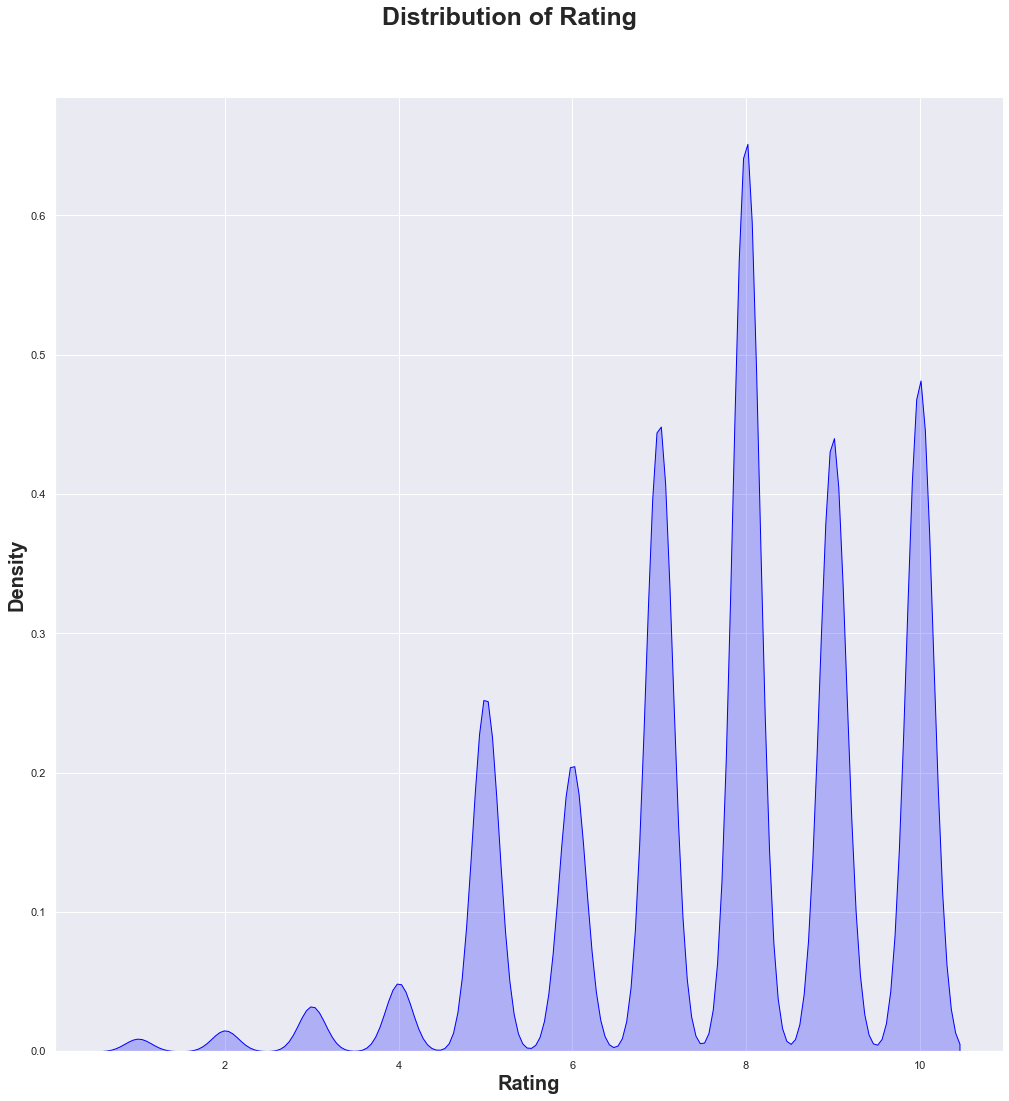

In [66]:
f.plot_density_rating(rating)

# Number of each rating in bar plot

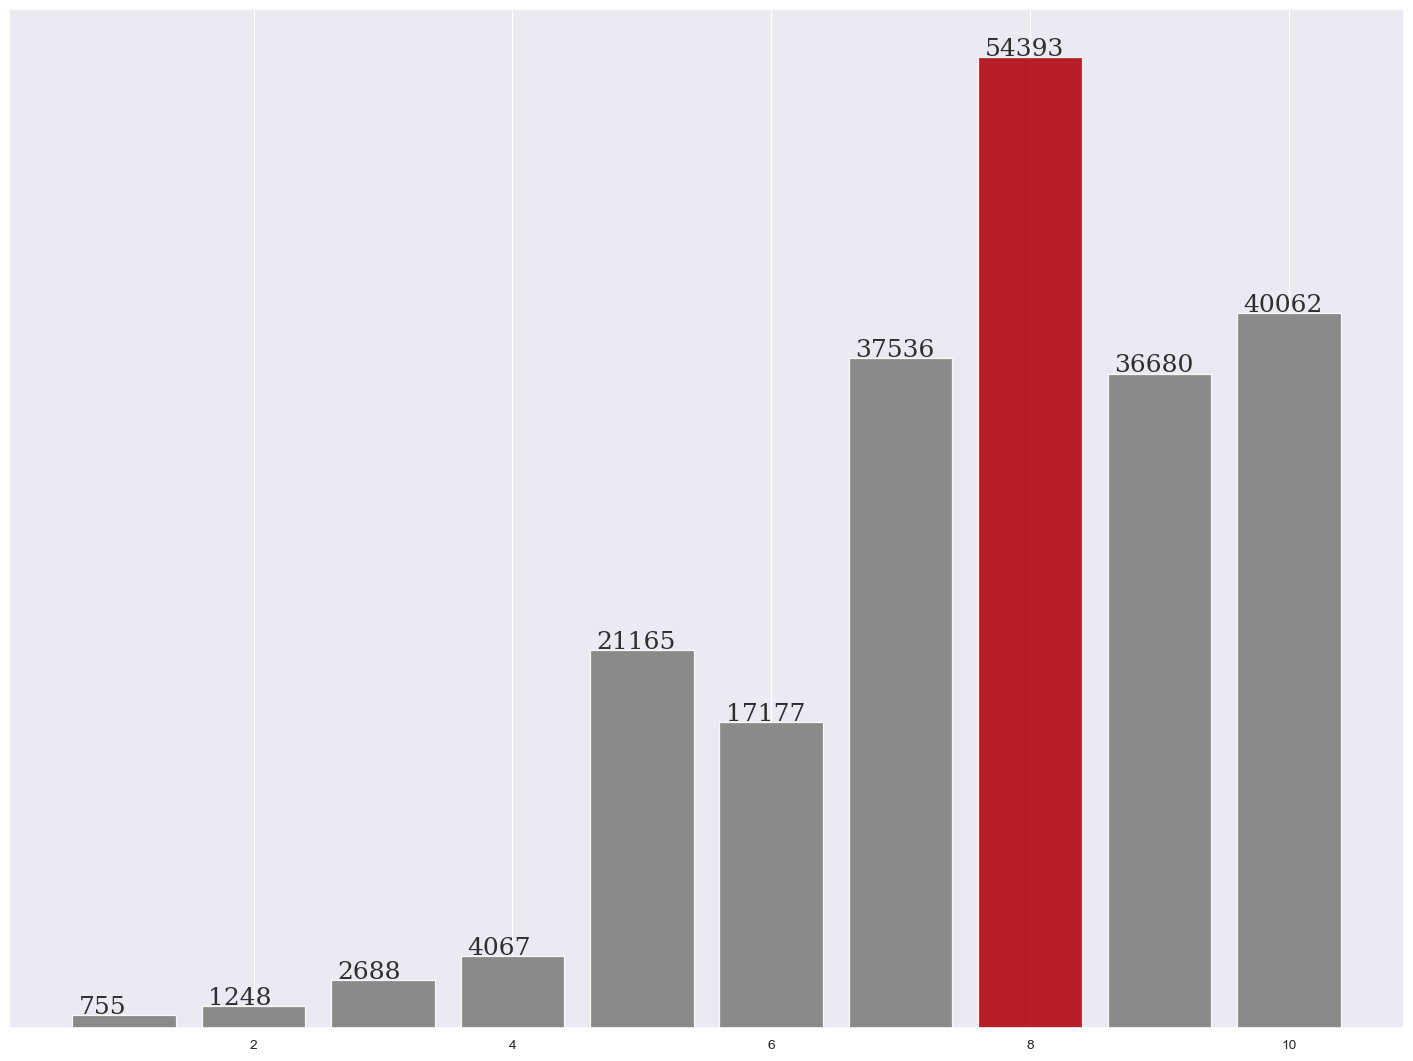

In [67]:
f.plot_number_of_rating_point(rating)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li><span style="color:#122ecc;">Rating 8</span> is the most rated value</li>
    <li>Users often tend to give rating for the book that they really like rather than the book that they do not like, so that the rating <span style="color:#122ecc;">from 1 to 4</span> is relatively low</li>
</ul>
</div>




<a id="3.2"></a>
# 3.2 How old are the users?
******

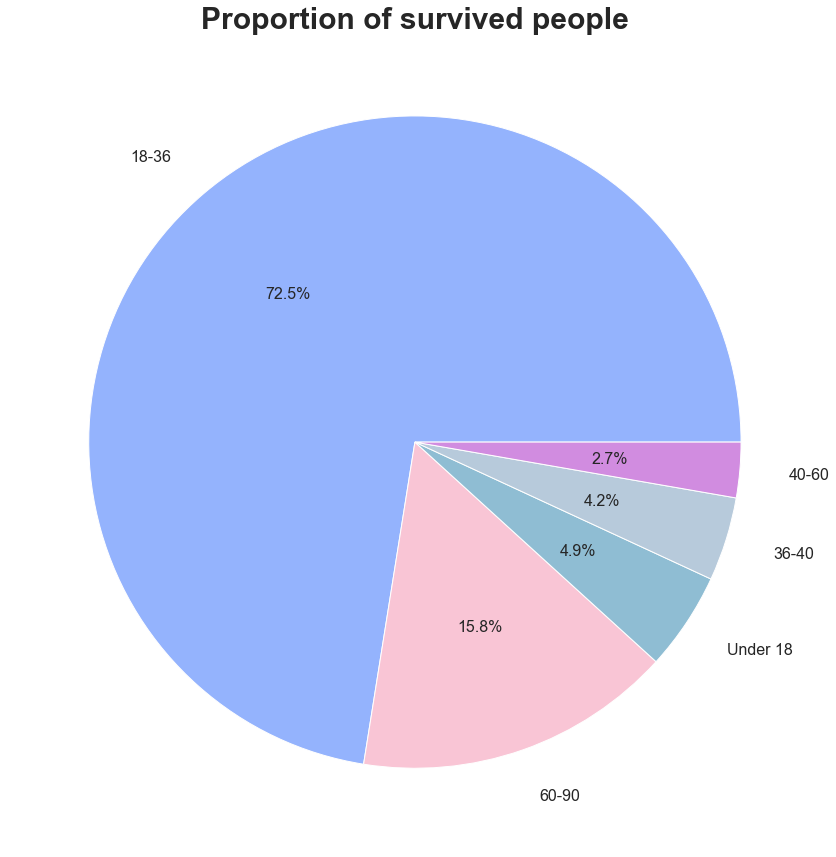

In [68]:
plt.rcParams['figure.figsize'] = [20, 15]
# Pie chart
labels = ['18-36', '60-90', 'Under 18', '36-40', '40-60']
#colors
colors = ['#94B3FD', '#F9C5D5', '#8FBDD3' ,'#B7CADB', '#D18CE0']
ax = plt.pie(user['Age_Range'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Proportion of age of reader', fontsize=30, fontweight = 'bold')
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Suprisingly, most of users are at <span style="color:#122ecc;">18-36 years old</span> 
        with over 72 percent </li>
    <li>In the second place, there are over  <span style="color:#122ecc;">15 percent</span> of the readers are at
         <span style="color:#122ecc;">60-90 years old</span>.</li>
    <li>The readers who are <span style="color:#122ecc;">under 18 is under 5 percent</span>. This group is one of the most considerable group since the content of book must be appropriate for them, but they are just a minor factor in our recommender system</li>
    <li>Both of the group <span style="color:#122ecc;">36-40 and 40-60</span> year-old reader still under 7 percent
    </li>
    <li>Hence, in this book recommender system we should concentrate on the group <span style="color:#122ecc;">18-36 and 60-90</span> year-old readers
    </li>
</ul>
</div>

<a id="3.3"></a>
# 3.3 The 10 country having the highest amount of users:
******

## Just the box plot

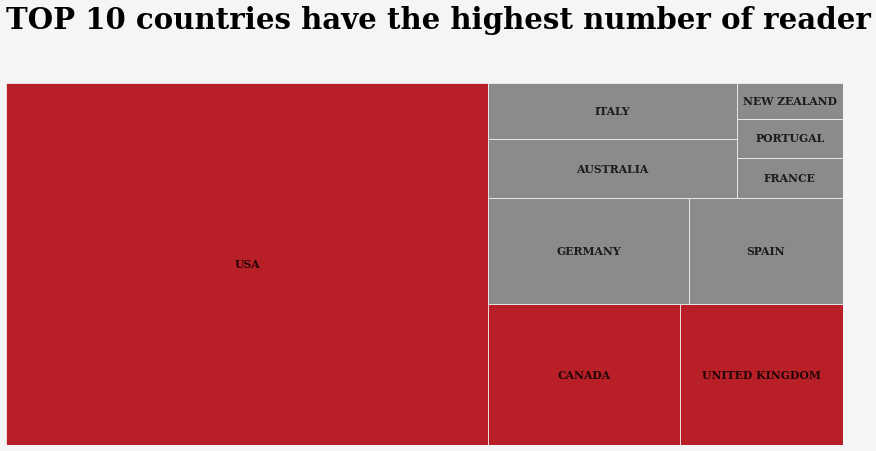

In [69]:
f.plot_box_country(user)

## World map

NETHERLANDS ANTILLES not found in regex


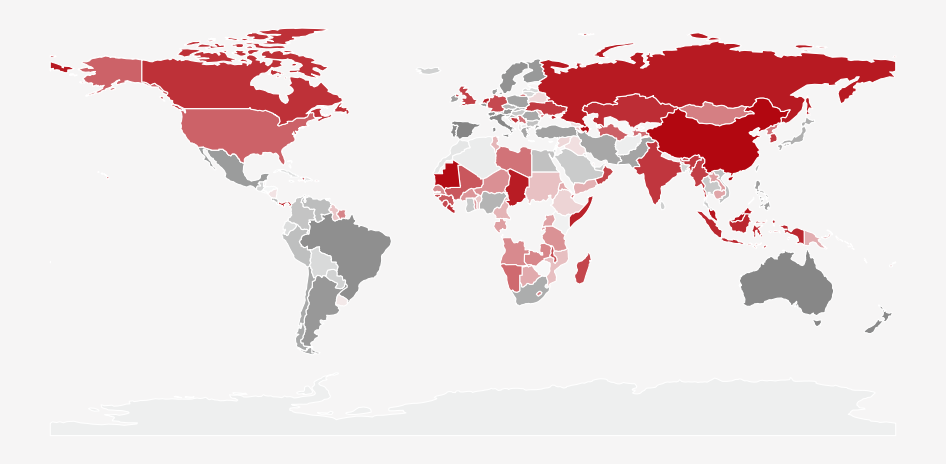

In [70]:
f.plot_world_map(user)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Top 10 countries having the highest readers which are <span style="color:#122ecc;">USA, CANADA, UNITED KINGDOM, GERMANY, SPAIN, AUSTRALIA, ITALY, FRANCE, PORTUGAL, NEW ZEALAND</span> </li>
    <li> <span style="color:#122ecc;">USA</span> has the highest users and the number of user is higher than 7 times compare to other countries </li>
</ul>
</div>

<a id="3.4"></a>
# 3.4 When did these books were published:
******

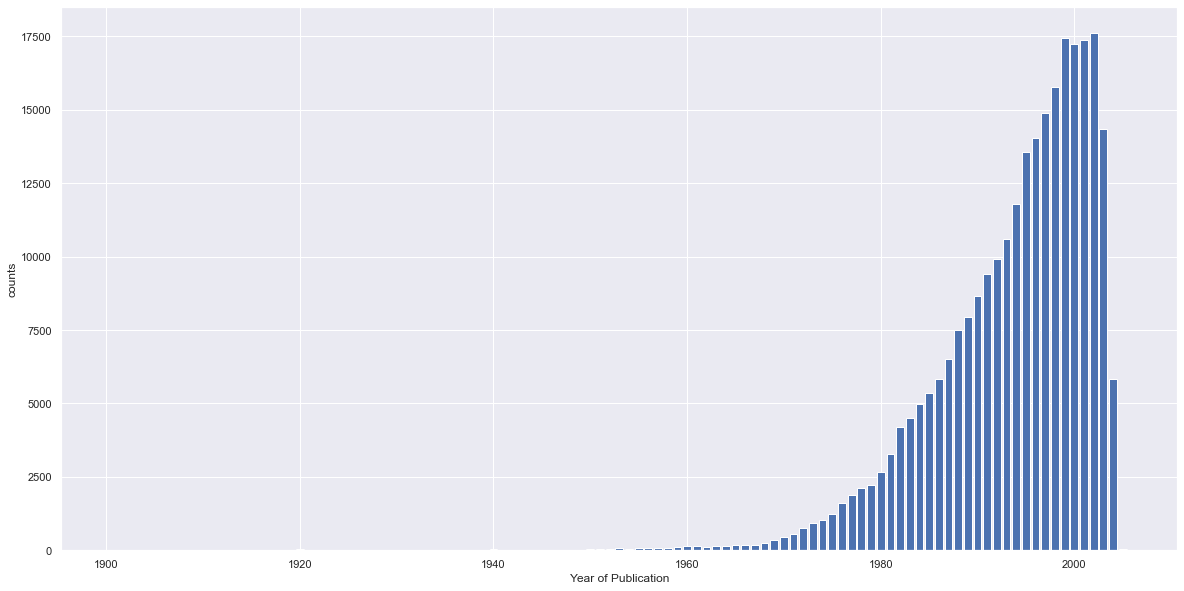

In [71]:
yr = book.Publication_year.value_counts().sort_index()
# I just want to fill the book that have occured 5 times
yr = yr.where(yr>5)
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(yr.index, yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Most of the book have been released in  <span style="color:#122ecc;">2000s</span> </li>
    <li>Currently, our service is not ideal for people who like to read old book which was published in the <span style="color:#122ecc;">1960s</span> </li>
</ul>
</div>

<a id="3.5"></a>
# 3.5 Average rating and number of ratings of the most popular books:
*****

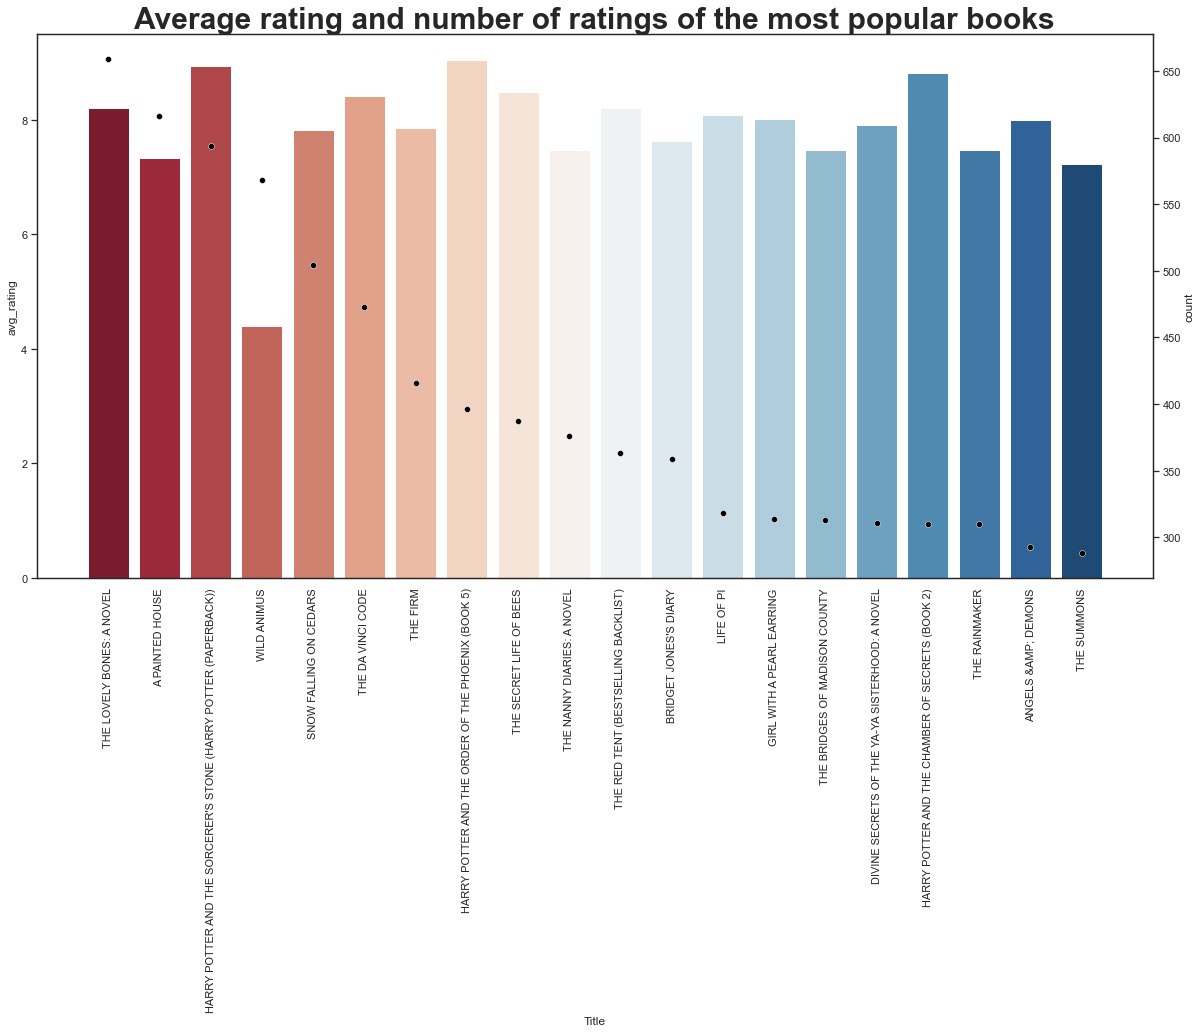

In [72]:
sns.set_style('white')

df_books_title = book_user_rating.groupby('Book_Title').agg({'ISBN': 'count', 'Book_Rating': 'mean'}).reset_index()
df_books_title.columns = ['Book Title', 'count', 'avg_rating']

titles_top_popular = df_books_title.sort_values('count', ascending=False).head(20)
f.draw_top_chart(titles_top_popular, 'Title', ['avg_rating', 'count'], 'Average rating and number of ratings of the most popular books')


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>The rating point for popular book is in range around from  <span style="color:#122ecc;">4 to 9</span> </li>
    <li>The <span style="color:#122ecc;">Wild Animus</span> has the lowest rating point</li>
    <li>Three <span style="color:#122ecc;">Harry Potter</span> series has the highest rating point</li>
</ul>
</div>

<a id="3.6"></a>
# 3.6 Average rating and number of ratings of the most popular authors:
*****

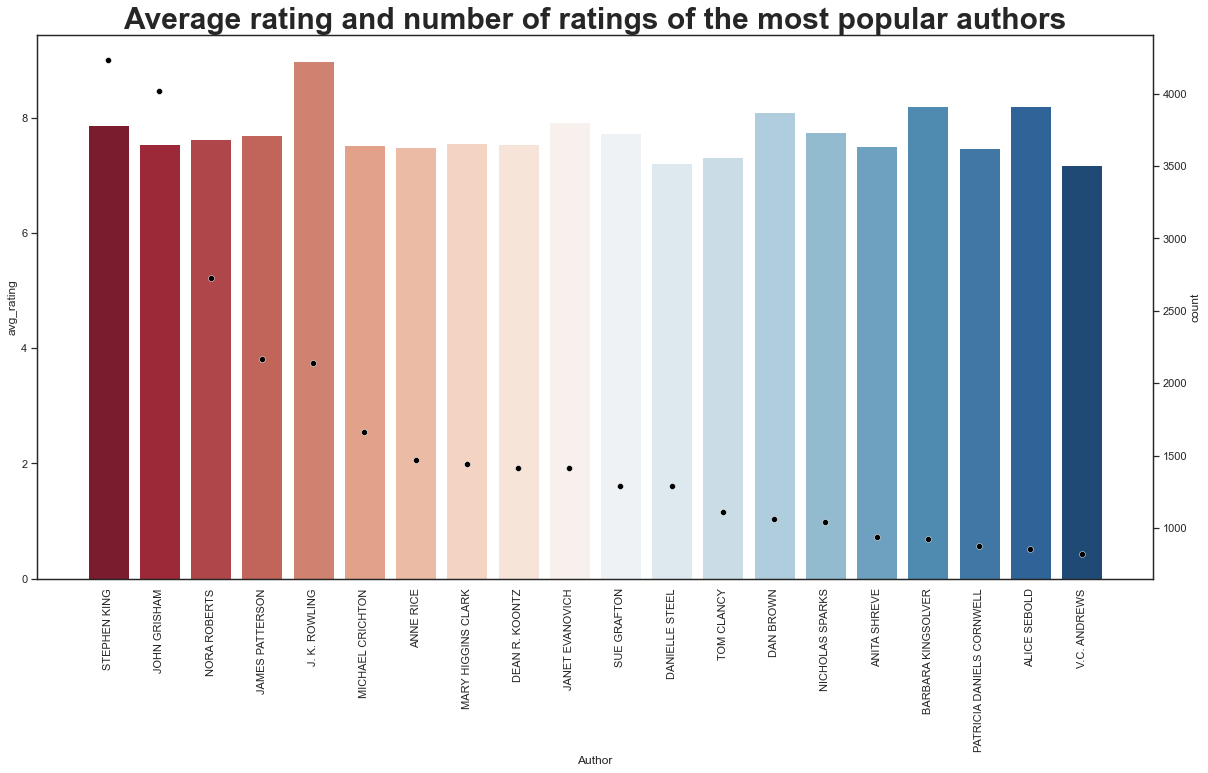

In [73]:
df_books_author = book_user_rating.groupby('Book_Author').agg({'ISBN': 'count', 'Book_Rating': 'mean'}).reset_index()
df_books_author.columns = ['Author', 'count', 'avg_rating']


authors_top_popular = df_books_author.sort_values('count', ascending=False).head(20)
f.draw_top_chart(authors_top_popular, 'Author', ['avg_rating', 'count'], 'Average rating and number of ratings of the most popular authors')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>The rating point for popular author is in range around from  <span style="color:#122ecc;">7 to 9</span> </li>
    <li>The <span style="color:#122ecc;">Danielle Steel</span> has the lowest rating point</li>
    <li>Three <span style="color:#122ecc;">J.K. Rowling</span> has the highest rating point</li>
</ul>
</div>

<a id="3.4"></a>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">3.4 Summary</li>
</ul>
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
    <br>
    
*******
    
<li>1. <span style="color:#122ecc;">Rating 8</span> is the most rated value.</li>
<br>
<li>2. Users often tend to give rating for the book that they really like rather than the book that they do not like, so that the rating <span style="color:#122ecc;">from 1 to 4</span> is relatively low.</li>
<br>
<li>3. Suprisingly, most of users are at <span style="color:#122ecc;">18-36 years old</span>with over 72 percent</li>
<br>
<li>4. In the second place, there are over  <span style="color:#122ecc;">15 percent</span> of the readers are at
         <span style="color:#122ecc;">60-90 years old</span>.</li>
<br>
<li>5. The readers who are <span style="color:#122ecc;">under 18 is under 5 percent</span>. This group is one of the most considerable group since the content of book must be appropriate for them, but they are just a minor factor in our recommender system.</li>
<br>
<li>6. Both of the group <span style="color:#122ecc;">36-40 and 40-60</span> year-old reader still under 7 percent</li>
<br>    
<li>7. Hence, in this book recommender system we should concentrate on the group <span style="color:#122ecc;">18-36 and 60-90</span> year-old readers.</li>
<br>    
<li>8. Top 10 countries having the highest readers which are <span style="color:#122ecc;">USA, CANADA, UNITED KINGDOM, GERMANY, SPAIN, AUSTRALIA, ITALY, FRANCE, PORTUGAL, NEW ZEALAND</span>.</li>
<br>    
<li>9. <span style="color:#122ecc;">USA</span> has the highest users and the number of user is higher than 7 times compare to other countries.</li>
<br>
<li>10. Most of the book have been released in  <span style="color:#122ecc;">2000s</span>.</li>
<br>    
<li>11. Currently, our service is not ideal for people who like to read old book which was published in the <span style="color:#122ecc;">1960s</span>.</li>
<br>    
<li>12. The rating point for popular book is in range around from  <span style="color:#122ecc;">4 to 9</span> </li>
<br> 
<li>13. The <span style="color:#122ecc;">Wild Animus</span> has the lowest rating point.</li>
<br>     
<li>14. Three <span style="color:#122ecc;">Harry Potter</span> series has the highest rating point.</li>
<br>     
<li>15. The rating point for popular author is in range around from  <span style="color:#122ecc;">7 to 9</span> .</li>
<br>     
<li>16. The <span style="color:#122ecc;">Danielle Steel</span> has the lowest rating point.</li>
<br>     
<li>17. Three <span style="color:#122ecc;">J.K. Rowling</span> has the highest rating point.</li>
<br>      
</ul>